In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [51]:
train_df = pd.read_csv('../project_2-master/datasets/train.csv')
test_df = pd.read_csv('../project_2-master/datasets/test.csv')

In [52]:
train_df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [53]:
test_df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD


In [54]:
train_df['Bedroom AbvGr']

0       3
1       4
2       3
3       3
4       3
       ..
2046    3
2047    1
2048    3
2049    3
2050    3
Name: Bedroom AbvGr, Length: 2051, dtype: int64

In [66]:
discrete_columns_train = train_df[['Id', 'Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
                            'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Mo Sold', 'SalePrice']]

In [67]:
discrete_columns_test = test_df[['Id', 'Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
                            'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Mo Sold']]

In [68]:
discrete_columns_train.isna().sum()

Id                  0
Year Built          0
Year Remod/Add      0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Fireplaces          0
Garage Yr Blt     114
Garage Cars         1
Mo Sold             0
SalePrice           0
dtype: int64

In [69]:
discrete_columns_test.isna().sum()

Id                 0
Year Built         0
Year Remod/Add     0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt     45
Garage Cars        0
Mo Sold            0
dtype: int64

In [70]:
def discrete_nulls(train, test):
    for _ in train:
        if train[_].isna().sum() > 0:
            train[_].fillna(np.mean(train[_]), inplace = True)
            
    for j in test:
        if test[j].isna().sum() > 0:
            test[j].fillna(np.mean(test[j]), inplace = True)
            
    print(train.isna().sum())
    print(test.isna().sum())
            
    return 

In [71]:
discrete_nulls(discrete_columns_train, discrete_columns_test)

Id                0
Year Built        0
Year Remod/Add    0
Bsmt Full Bath    0
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
TotRms AbvGrd     0
Fireplaces        0
Garage Yr Blt     0
Garage Cars       0
Mo Sold           0
SalePrice         0
dtype: int64
Id                0
Year Built        0
Year Remod/Add    0
Bsmt Full Bath    0
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
TotRms AbvGrd     0
Fireplaces        0
Garage Yr Blt     0
Garage Cars       0
Mo Sold           0
dtype: int64


/Users/aidancurley/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


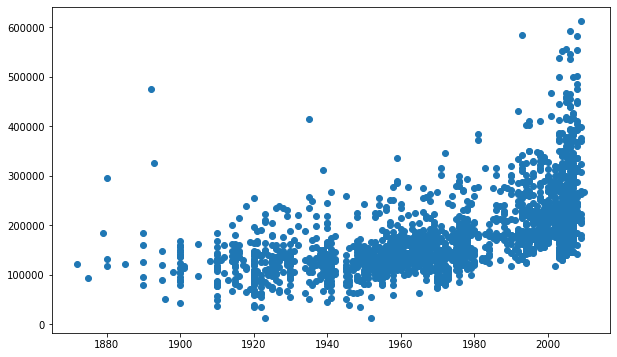

In [72]:
plt.figure(figsize=(10,6))
plt.scatter(discrete_columns_train['Year Built'], train_df['SalePrice'])

In [106]:
discrete_columns_train.corr()[['SalePrice']].T > .50

,Id,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Mo Sold,SalePrice
SalePrice,False,True,True,False,False,True,False,False,False,True,False,True,True,False,True


In [109]:
corr_df

,Id,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Mo Sold,SalePrice
SalePrice,False,True,True,False,False,True,False,False,False,True,False,True,True,False,True


In [113]:
for n in corr_df:
    if n == True:
        print(n)

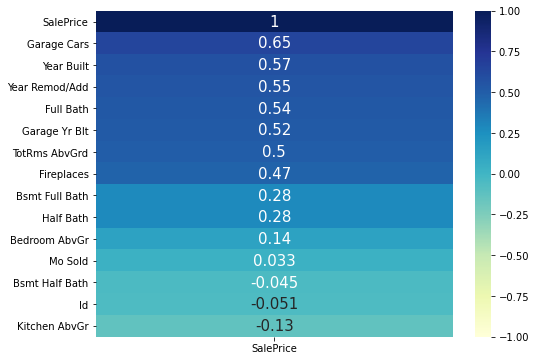

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(discrete_columns_train.corr()[['SalePrice']].sort_values(by="SalePrice",
       ascending=False),
           annot=True,
           cmap='YlGnBu',
           annot_kws={'fontsize':15},
           vmin=-1, vmax=1, );